# Ann Arbor Housing Survey: Exploratory Data Analysis
<hr>

## Eric

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re
import json

In [3]:
df = pd.read_json('../data/aggregated.json')

### Distribution of Price

The first graph (excluding some very high outliers around 15000) shows a histogram and KDE of the overall price distribution. The second graph uses a log-linear scale and plots both the histogram and a rug plot to give a better impression of the actual price distribution; the plot shows characteristics of a long tail. 

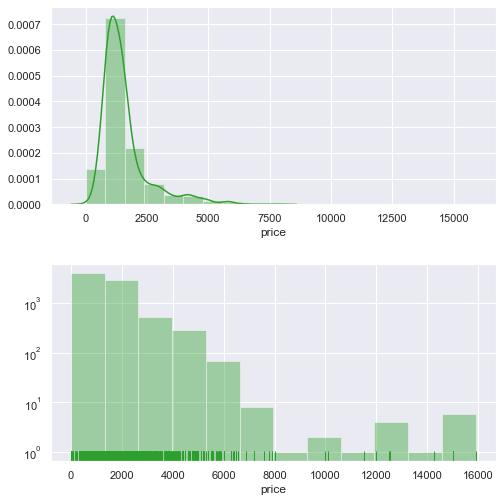

In [11]:
sns.set(style='darkgrid')
plt.subplots(2, 1, figsize=(7,7))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.subplot(2, 1, 1)
ax1 = sns.distplot(df['price'], kde_kws={'bw':200, 'clip':[-1000, 10000]}, bins=20, color='#2ca02c')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2, 1, 2)
ax2 = sns.distplot(df['price'], bins=12, color='#2ca02c', kde=False, rug=True)
ax2.set_yscale('log')
plt.savefig('price-dist.png', dpi=300)

Some descriptive statistics of the price distribution:

In [12]:
df['price'].describe()

count     7818.000000
mean      1583.984971
std       1095.510351
min          1.000000
25%        989.000000
50%       1299.000000
75%       1725.000000
max      15900.000000
Name: price, dtype: float64

### Joint distribution of price and area
This plot shows the joint (and marginal) distribution(s) of price and area. There is a clear positive association, although variance tends to increase as either variable increases. Most listings seem to cost between 500 and 2000 dollars and have total areas between 300 and 1200 square feet.

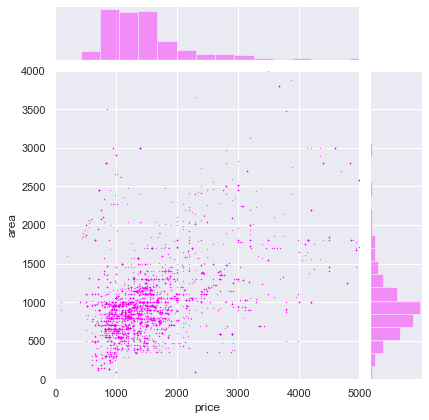

In [21]:
area = df[df['area'].notnull() & df['area'] != 0]['area']
df_plot = df.copy()
df_plot['area'] = area

# ignore outliers! plot does NOT show long tail
sns.set(style='darkgrid')
g = sns.jointplot('price', 'area', df_plot, kind='scatter', alpha=0.8, s=0.1, color='magenta')
g.ax_joint.set_ylim([0, 4000])
g.ax_joint.set_xlim([0, 5000])
plt.savefig('area-vs-price.png', dpi=300)

### Correlation Heatmap
The correlation heatmap below shows that intuitive trends are reflected in the data; for instance, we'd expect that price is highly correlated with the number of available bedrooms in a house or apartment. Note that many of the other correlations are relatively weak.

,price,bed,bath,area,laundry,pets,parking,year_built
price,1.000000,0.630296,0.340268,0.460245,-0.066057,-0.195342,-0.081144,0.253818
bed,0.630296,1.000000,0.666135,0.669075,-0.027155,-0.080173,0.076723,-0.237187
bath,0.340268,0.666135,1.000000,0.578336,-0.002040,-0.093690,0.057643,0.221848
area,0.460245,0.669075,0.578336,1.000000,-0.056068,-0.123596,0.066532,0.245898
laundry,-0.066057,-0.027155,-0.002040,-0.056068,1.000000,0.193587,0.203173,0.404787
pets,-0.195342,-0.080173,-0.093690,-0.123596,0.193587,1.000000,0.320473,NaN
parking,-0.081144,0.076723,0.057643,0.066532,0.203173,0.320473,1.000000,0.175739
year_built,0.253818,-0.237187,0.221848,0.245898,0.404787,NaN,0.175739,1.000000


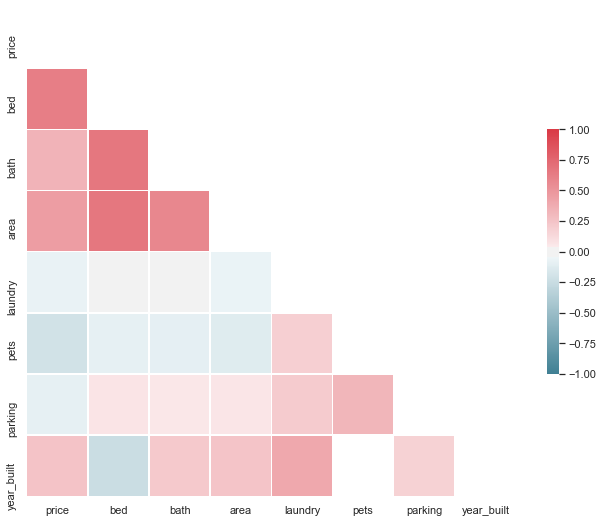

In [13]:
sns.set(style='white')
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corr-heatmap.png', dpi=300)
corr

Cabrio Properties                       318
Campus Management, Inc.                 206
PMSI                                    177
Oxford Property Management              176
J Keller Properties                     169
The Hayman Company                      138
Oakland Management Corp.                130
Cappo Management & Deinco Properties    123
Issa Properties                         112
Village Green                           102
Name: company, dtype: int64


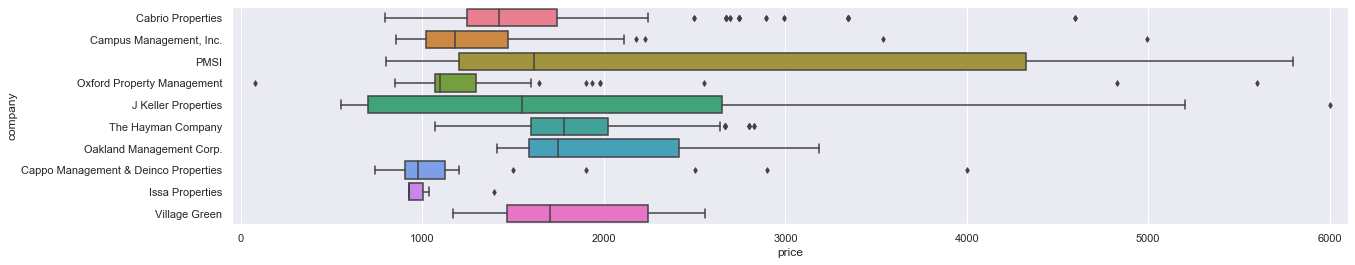

In [116]:
df_plot = df.copy()
companies = df['company'].value_counts().iloc[:10].index.tolist()
print(df['company'].value_counts().iloc[:10])

df_plot = df_plot[df_plot['company'].isin(companies)]
sns.set(style='darkgrid')
plt.subplots(1,1, figsize=(20,4))
sns.boxplot(x='price', y='company', palette="husl", data=df_plot, fliersize=4, order=companies, saturation=0.8)
plt.xlim([-50, 6100])
plt.savefig('boxplot-company.png', dpi=300)

## Grant

In [6]:
df.head()

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095.0,2.0,1.0,876.0,None,None,1.0,1.0,1.0,[],apartment,NaN,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000.0,4.0,2.5,2000.0,None,None,1.0,1.0,1.0,[],house,NaN,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695.0,3.0,2.0,NaN,None,None,1.0,0.0,1.0,[],apartment,NaN,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385.0,1.0,1.0,800.0,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185.0,1.0,1.0,800.0,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...


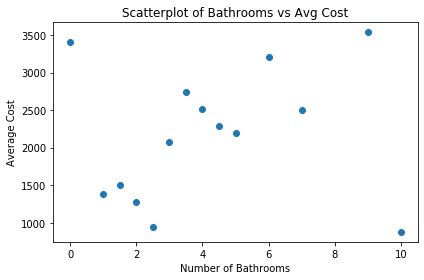

In [8]:
price_per_bath = df.groupby('bath')['price'].mean()
x1 = df['bath'].unique()
y1 = price_per_bath
x1 = x1[~np.isnan(x1)]

plt.scatter(x = x1,y = y1)
plt.title('Scatterplot of Bathrooms vs Avg Cost')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Cost')
plt.tight_layout()

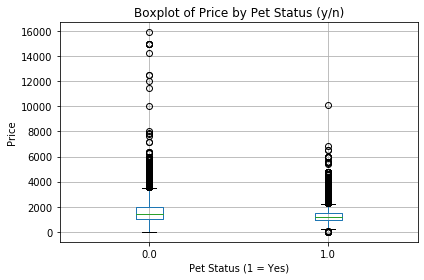

In [9]:
df.boxplot(column='price', by='pets')
plt.suptitle('') # removed default subtitle, it overlaps with title
plt.title('Boxplot of Price by Pet Status (y/n)')
plt.xlabel('Pet Status (1 = Yes)')
plt.ylabel('Price')
plt.tight_layout()

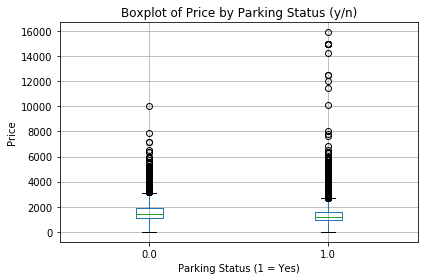

In [10]:
df.boxplot(column='price', by='parking')
plt.suptitle('') # removed default subtitle, it overlaps with title
plt.title('Boxplot of Price by Parking Status (y/n)')
plt.xlabel('Parking Status (1 = Yes)')
plt.ylabel('Price')
plt.tight_layout()

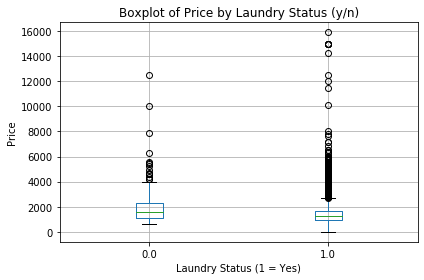

In [11]:
df.boxplot(column='price', by='laundry')
plt.suptitle('') # removed default subtitle, it overlaps with title
plt.title('Boxplot of Price by Laundry Status (y/n)')
plt.xlabel('Laundry Status (1 = Yes)')
plt.ylabel('Price')
plt.tight_layout()